Importing required libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import recall_score






from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold



Reading the dataframe

In [2]:
df=pd.read_csv("fetal_health.csv")

In [3]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [4]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Checking for null values

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Checking for duplicate values

In [7]:
df.duplicated().sum()


13

In [8]:
df[df.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [9]:
df[df["accelerations"]==0.007]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
67,140.0,0.007,0.000,0.004,0.000,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.000,0.004,0.000,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
77,145.0,0.007,0.009,0.002,0.000,0.0,0.0,36.0,1.4,0.0,...,57.0,176.0,3.0,1.0,148.0,150.0,150.0,12.0,1.0,1.0
107,125.0,0.007,0.004,0.006,0.002,0.0,0.0,22.0,2.1,0.0,...,73.0,178.0,8.0,0.0,126.0,126.0,128.0,11.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,130.0,0.007,0.001,0.000,0.000,0.0,0.0,67.0,0.9,0.0,...,112.0,158.0,4.0,0.0,137.0,138.0,139.0,4.0,0.0,1.0
2071,130.0,0.007,0.001,0.005,0.000,0.0,0.0,69.0,0.7,5.0,...,112.0,158.0,4.0,0.0,139.0,139.0,140.0,3.0,0.0,1.0
2072,130.0,0.007,0.001,0.001,0.000,0.0,0.0,70.0,0.7,6.0,...,127.0,158.0,1.0,0.0,139.0,140.0,141.0,3.0,0.0,1.0
2073,130.0,0.007,0.001,0.001,0.000,0.0,0.0,71.0,0.7,5.0,...,127.0,158.0,1.0,0.0,139.0,139.0,140.0,3.0,0.0,1.0


Did not remove duplicated values because it might be that both the fetal's have same health condition in the dataset there is no column to uniquly identify fetal

# Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Highly imbalance in the data.To Deal with this later in model building we can use bagging and boosting and use pression and recall.If my model predicts all as 1 then also accuracy will be high becasue out of all correct values how many are predicted as correct is accuracy

<Axes: xlabel='fetal_health', ylabel='count'>

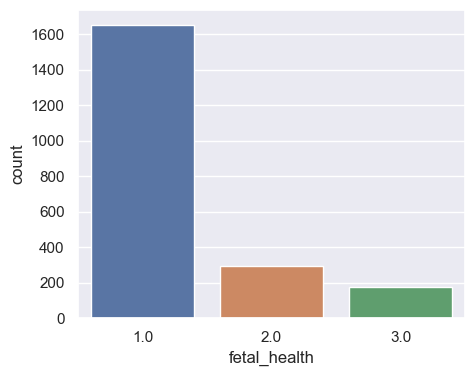

In [11]:

sns.set(rc={'figure.figsize':(5,4)})

sns.countplot(data=df,x="fetal_health")

In [12]:
df["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Scatter Plot

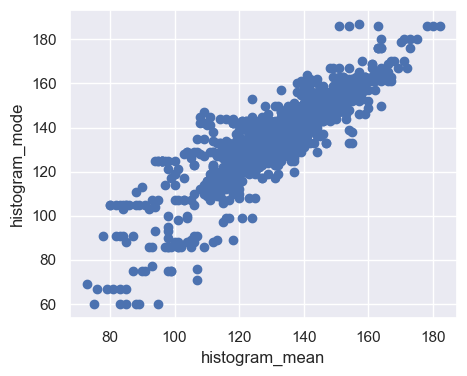

In [13]:
plt.scatter(df["histogram_mean"],df["histogram_mode"])
plt.xlabel("histogram_mean")
plt.ylabel("histogram_mode")
plt.show()

<Axes: ylabel='Density'>

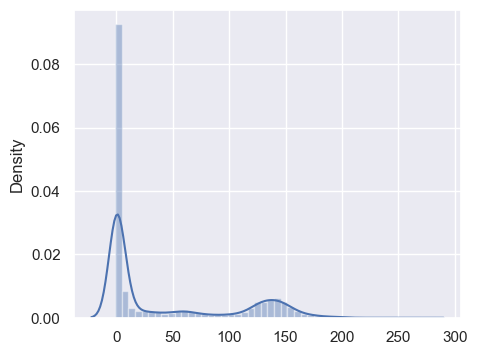

In [14]:
sns.distplot(df)


Correlation

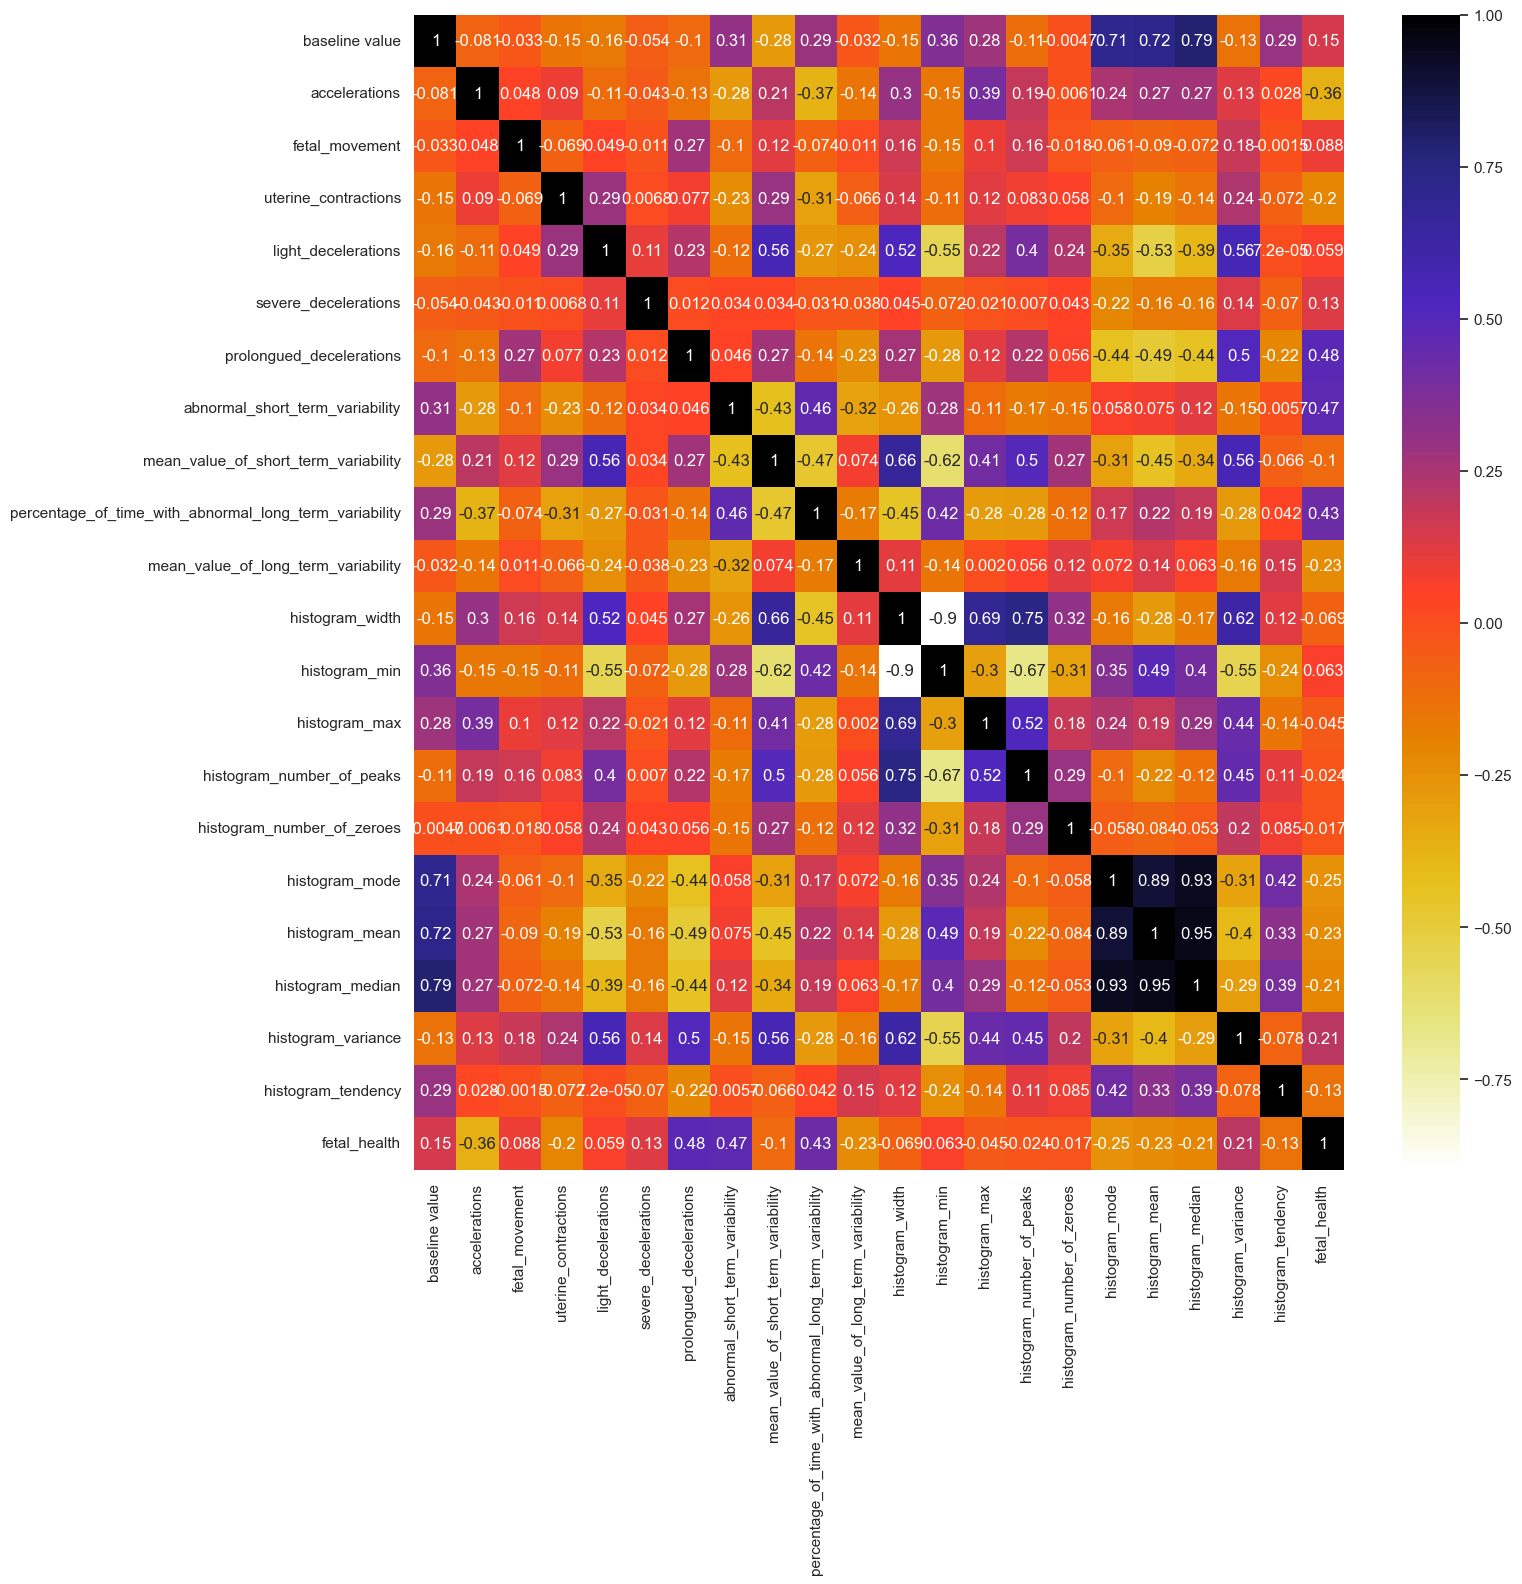

In [15]:


cor = df.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Correlation between independent features

In [16]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[j]  
                col_corr.append(colname)
    return col_corr

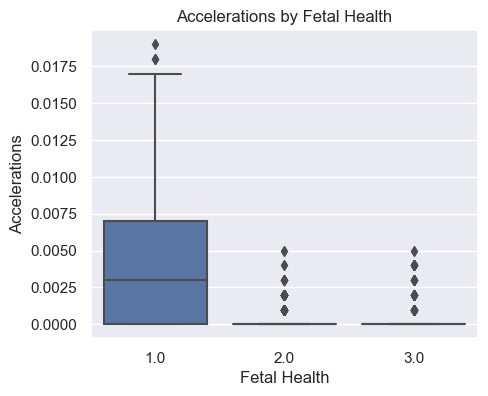

In [17]:

# load data into a pandas DataFrame


# plot a boxplot of accelerations grouped by fetal health
sns.boxplot(x='fetal_health', y='accelerations', data=df)
plt.xlabel('Fetal Health')
plt.ylabel('Accelerations')
plt.title('Accelerations by Fetal Health')
plt.show()


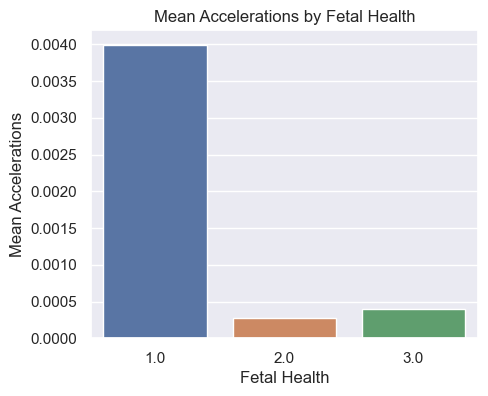

In [18]:

mean_accelerations = df.groupby('fetal_health')['accelerations'].mean()

# plot a bar plot of the mean accelerations for each level of fetal health
sns.barplot(x=mean_accelerations.index, y=mean_accelerations.values)
plt.xlabel('Fetal Health')
plt.ylabel('Mean Accelerations')
plt.title('Mean Accelerations by Fetal Health')
plt.show()


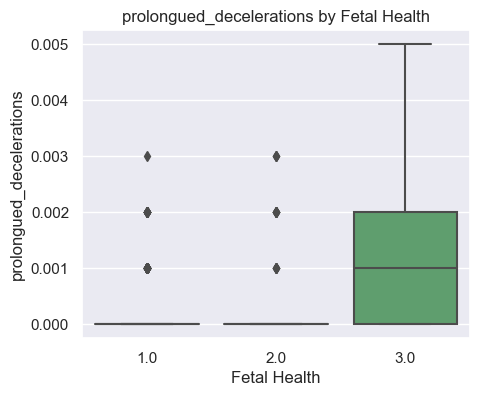

In [19]:

sns.boxplot(x='fetal_health', y='prolongued_decelerations', data=df)
plt.xlabel('Fetal Health')
plt.ylabel('prolongued_decelerations')
plt.title('prolongued_decelerations by Fetal Health')
plt.show()


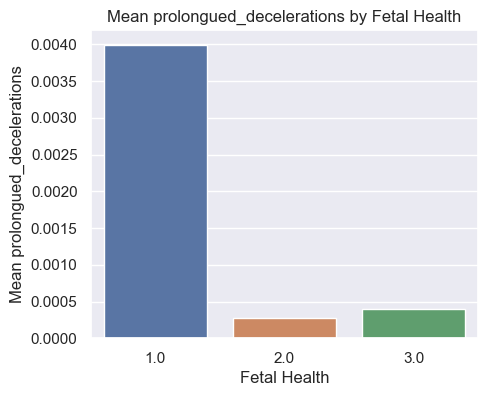

In [20]:
mean_prolongued_decelerations = df.groupby('fetal_health')['prolongued_decelerations'].mean()

sns.barplot(x=mean_prolongued_decelerations.index, y=mean_accelerations.values)
plt.xlabel('Fetal Health')
plt.ylabel('Mean prolongued_decelerations')
plt.title('Mean prolongued_decelerations by Fetal Health')
plt.show()

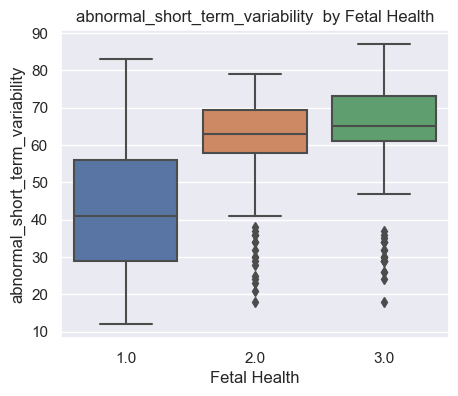

In [21]:
sns.boxplot(x='fetal_health', y='abnormal_short_term_variability', data=df)
plt.xlabel('Fetal Health')
plt.ylabel('abnormal_short_term_variability')
plt.title('abnormal_short_term_variability  by Fetal Health')
plt.show()

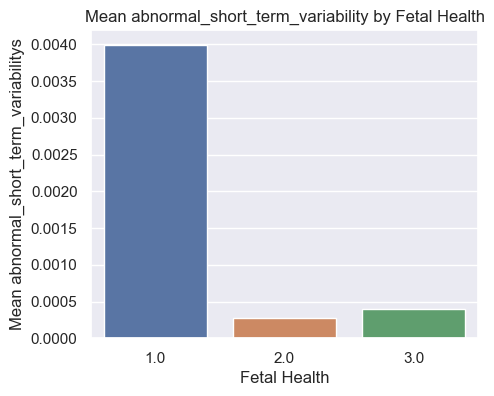

In [22]:
mean_abnormal_short_term_variability = df.groupby('fetal_health')['abnormal_short_term_variability'].mean()

sns.barplot(x=mean_abnormal_short_term_variability.index, y=mean_accelerations.values)
plt.xlabel('Fetal Health')
plt.ylabel('Mean abnormal_short_term_variabilitys')
plt.title('Mean abnormal_short_term_variability by Fetal Health')
plt.show()

Box PLot

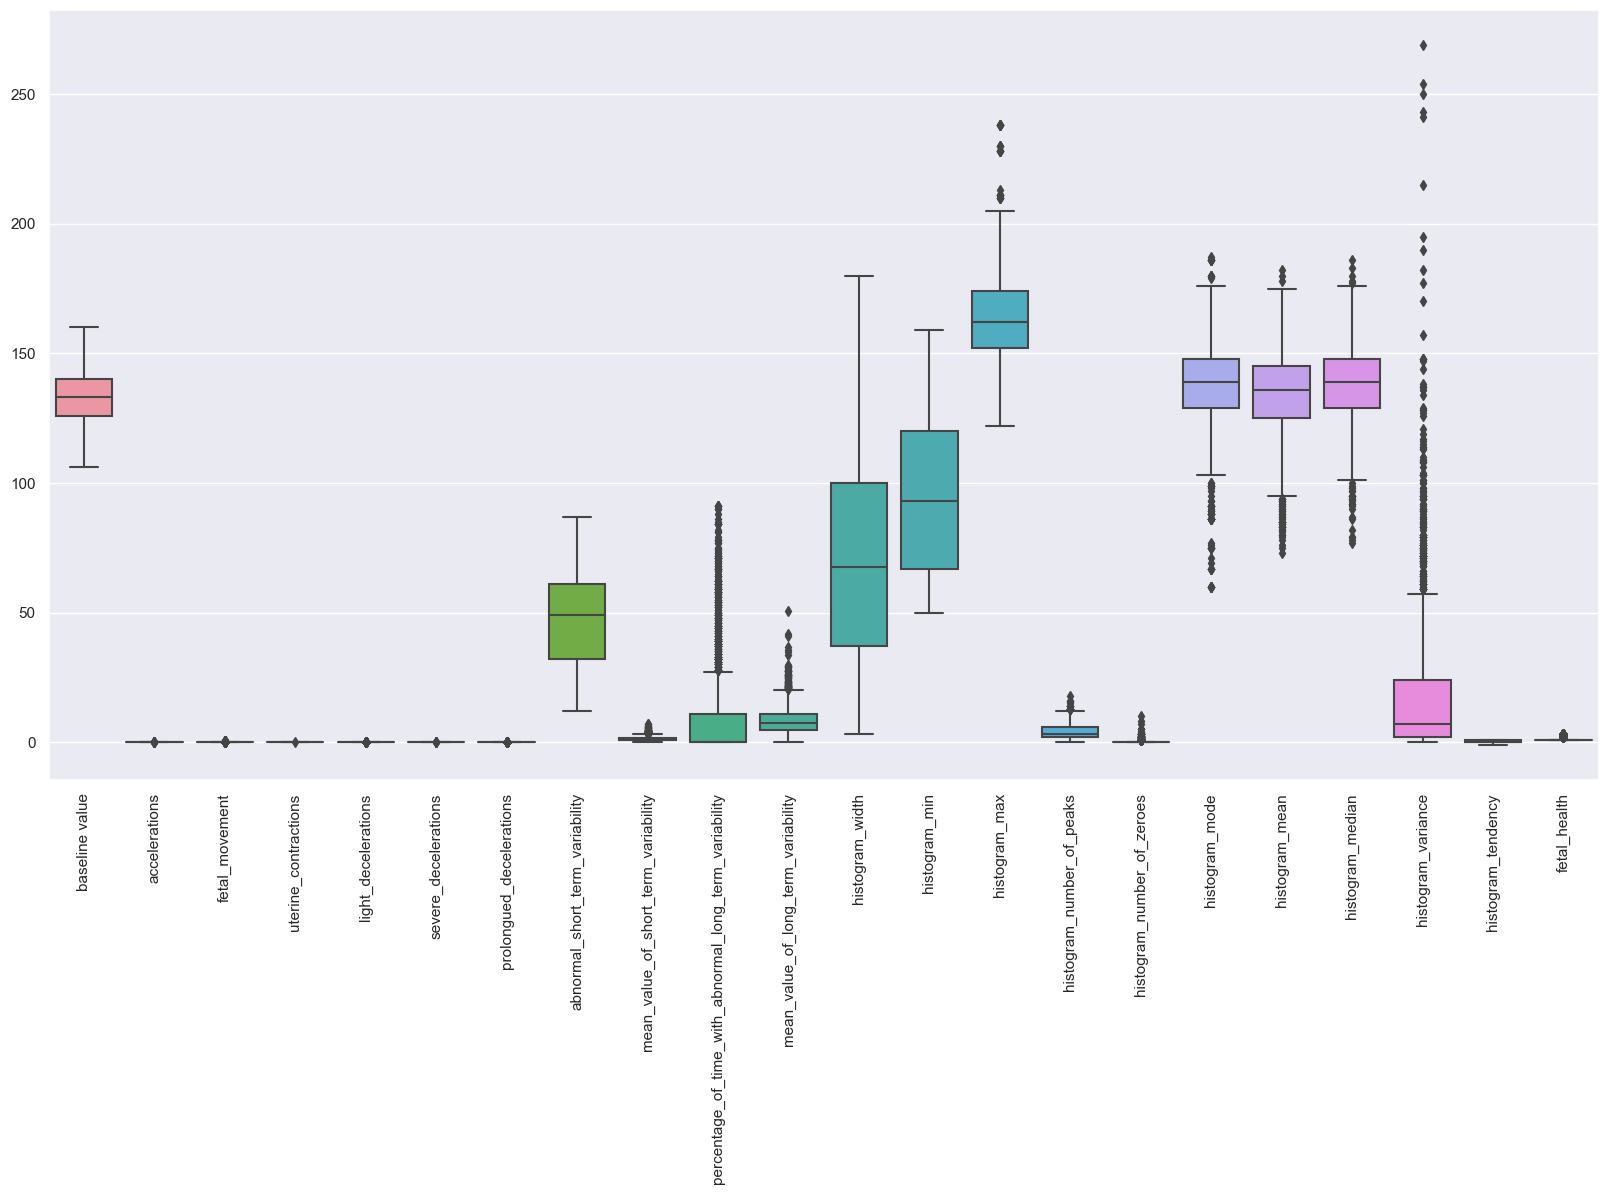

In [23]:

plt.figure(figsize=(20,10))
sns.boxplot(data = df)
plt.xticks(rotation=90)
plt.show()

# Splitting into Training and Testing

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
df_Train,df_Test=train_test_split(df,test_size=0.2,random_state=42)

In [26]:
df_Train.iloc[:,0:21]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1233,125.0,0.000,0.000,0.008,0.000,0.0,0.000,32.0,1.1,3.0,...,51.0,96.0,147.0,4.0,0.0,126.0,125.0,127.0,2.0,0.0
480,140.0,0.000,0.000,0.001,0.000,0.0,0.000,60.0,0.8,32.0,...,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
1111,122.0,0.000,0.000,0.000,0.001,0.0,0.000,20.0,1.8,0.0,...,39.0,103.0,142.0,1.0,0.0,120.0,119.0,121.0,3.0,0.0
1303,137.0,0.005,0.000,0.005,0.002,0.0,0.000,36.0,0.9,0.0,...,63.0,115.0,178.0,4.0,0.0,148.0,148.0,149.0,9.0,0.0
861,142.0,0.003,0.000,0.004,0.000,0.0,0.000,46.0,0.7,27.0,...,26.0,133.0,159.0,1.0,0.0,150.0,148.0,150.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,130.0,0.009,0.001,0.004,0.001,0.0,0.000,52.0,1.3,0.0,...,99.0,73.0,172.0,6.0,0.0,144.0,141.0,144.0,16.0,1.0
1095,123.0,0.012,0.000,0.002,0.000,0.0,0.000,22.0,2.2,0.0,...,52.0,100.0,152.0,2.0,0.0,131.0,132.0,133.0,4.0,0.0
1130,122.0,0.005,0.000,0.004,0.005,0.0,0.000,20.0,2.6,0.0,...,98.0,60.0,158.0,6.0,0.0,131.0,121.0,126.0,31.0,0.0
1294,115.0,0.003,0.000,0.008,0.002,0.0,0.001,24.0,1.6,0.0,...,108.0,71.0,179.0,3.0,2.0,133.0,122.0,129.0,45.0,0.0


In [27]:
X_train=df_Train.iloc[:,0:21]
y_train=df_Train["fetal_health"]
z=df_Train.iloc[:,0:21]


In [28]:
X_test=df_Test.iloc[:,0:21]
y_test=df_Test["fetal_health"]

# Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=z.columns)

X_train


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.351852,0.000000,0.000000,0.533333,0.000000,0.0,0.0,0.266667,0.132353,0.032967,...,0.271186,0.422018,0.215517,0.222222,0.0,0.523810,0.477064,0.458716,0.007435,0.5
1,0.629630,0.000000,0.000000,0.066667,0.000000,0.0,0.0,0.640000,0.088235,0.351648,...,0.661017,0.266055,0.663793,0.500000,0.0,0.642857,0.623853,0.596330,0.011152,0.5
2,0.296296,0.000000,0.000000,0.000000,0.066667,0.0,0.0,0.106667,0.235294,0.000000,...,0.203390,0.486239,0.172414,0.055556,0.0,0.476190,0.422018,0.403670,0.011152,0.5
3,0.574074,0.277778,0.000000,0.333333,0.133333,0.0,0.0,0.320000,0.102941,0.000000,...,0.338983,0.596330,0.482759,0.222222,0.0,0.698413,0.688073,0.660550,0.033457,0.5
4,0.666667,0.166667,0.000000,0.266667,0.000000,0.0,0.0,0.453333,0.073529,0.296703,...,0.129944,0.761468,0.318966,0.055556,0.0,0.714286,0.688073,0.669725,0.003717,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.444444,0.500000,0.002079,0.266667,0.066667,0.0,0.0,0.533333,0.161765,0.000000,...,0.542373,0.211009,0.431034,0.333333,0.0,0.666667,0.623853,0.614679,0.059480,1.0
1696,0.314815,0.666667,0.000000,0.133333,0.000000,0.0,0.0,0.133333,0.294118,0.000000,...,0.276836,0.458716,0.258621,0.111111,0.0,0.563492,0.541284,0.513761,0.014870,0.5
1697,0.296296,0.277778,0.000000,0.266667,0.333333,0.0,0.0,0.106667,0.352941,0.000000,...,0.536723,0.091743,0.310345,0.333333,0.0,0.563492,0.440367,0.449541,0.115242,0.5
1698,0.166667,0.166667,0.000000,0.533333,0.133333,0.0,0.2,0.160000,0.205882,0.000000,...,0.593220,0.192661,0.491379,0.166667,0.2,0.579365,0.449541,0.477064,0.167286,0.5


In [30]:
X_test = scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=z.columns)
X_test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.500000,0.111111,0.020790,0.200000,0.133333,0.0,0.0,0.453333,0.132353,0.000000,...,0.372881,0.412844,0.362069,0.277778,0.0,0.626984,0.568807,0.559633,0.033457,0.5
1,0.351852,0.000000,0.002079,0.600000,0.533333,0.0,0.0,0.666667,0.220588,0.000000,...,0.389831,0.165138,0.155172,0.277778,0.0,0.555556,0.394495,0.440367,0.107807,1.0
2,0.462963,0.222222,0.006237,0.266667,0.333333,0.0,0.2,0.640000,0.279412,0.000000,...,0.491525,0.256881,0.396552,0.444444,0.0,0.579365,0.495413,0.504587,0.078067,0.5
3,0.462963,0.611111,0.000000,0.333333,0.000000,0.0,0.0,0.226667,0.161765,0.000000,...,0.485876,0.293578,0.422414,0.444444,0.0,0.658730,0.660550,0.623853,0.033457,1.0
4,0.351852,0.000000,0.000000,0.533333,0.466667,0.0,0.2,0.693333,0.161765,0.000000,...,0.418079,0.256881,0.284483,0.222222,0.0,0.428571,0.348624,0.339450,0.026022,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.722222,0.000000,0.043659,0.000000,0.000000,0.0,0.0,0.826667,0.014706,0.329670,...,0.288136,0.743119,0.543103,0.111111,0.0,0.674603,0.651376,0.633028,0.003717,0.0
422,0.462963,0.000000,0.000000,0.333333,0.533333,0.0,0.0,0.266667,0.235294,0.065934,...,0.531073,0.082569,0.293103,0.166667,0.1,0.595238,0.431193,0.513761,0.260223,1.0
423,0.703704,0.333333,0.010395,0.133333,0.000000,0.0,0.0,0.280000,0.220588,0.000000,...,0.564972,0.192661,0.448276,0.277778,0.1,0.714286,0.697248,0.678899,0.037175,1.0
424,0.555556,0.000000,0.006237,0.533333,0.066667,0.0,0.0,0.733333,0.294118,0.000000,...,0.237288,0.458716,0.198276,0.166667,0.0,0.579365,0.532110,0.541284,0.007435,1.0


In [31]:
model_params={
    'svm':{
        'model':SVC(),
        'params':{
           'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']
        }
                  

        },
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [10, 50, 100],
              'max_depth': [2,3, 4,5,6],
              'max_features': ['sqrt', 'log2']
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
        
    },
    "KNN":{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': list(range(1, 11))
            
        }
    },
    "Desision Tree":{
        "model":DecisionTreeClassifier(),
        'params' : {
         'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 4, 6, 8],
        'min_samples_leaf': [1, 2, 3, 4]
}
    },
    "AdaBoost":{
        "model": AdaBoostClassifier(),
        "params":{
            'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 1]
        }
    }
    
}

In [32]:
scores=[]
kfold = StratifiedKFold(n_splits=5)

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=kfold,n_jobs=4,scoring="recall_macro")
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_mean_score':clf.best_score_,
        "parameters":clf.best_params_
    })
    

In [33]:
scores

[{'model': 'svm',
  'best_mean_score': 0.849968795847323,
  'parameters': {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}},
 {'model': 'Random Forest',
  'best_mean_score': 0.8033816954946003,
  'parameters': {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}},
 {'model': 'logistic_regression',
  'best_mean_score': 0.7781710043667995,
  'parameters': {'C': 10}},
 {'model': 'KNN',
  'best_mean_score': 0.8140219593741929,
  'parameters': {'n_neighbors': 1}},
 {'model': 'Desision Tree',
  'best_mean_score': 0.8232798184621177,
  'parameters': {'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 2}},
 {'model': 'AdaBoost',
  'best_mean_score': 0.7962914113056484,
  'parameters': {'learning_rate': 1, 'n_estimators': 200}}]

In [34]:
score_dataframe=pd.DataFrame(scores)
score_dataframe

,model,best_mean_score,parameters
0,svm,0.849969,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}"
1,Random Forest,0.803382,"{'max_depth': 6, 'max_features': 'sqrt', 'n_es..."
2,logistic_regression,0.778171,{'C': 10}
3,KNN,0.814022,{'n_neighbors': 1}
4,Desision Tree,0.823280,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s..."
5,AdaBoost,0.796291,"{'learning_rate': 1, 'n_estimators': 200}"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'svm'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'logistic_regression'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Desision Tree'),
  Text(5, 0, 'AdaBoost')])

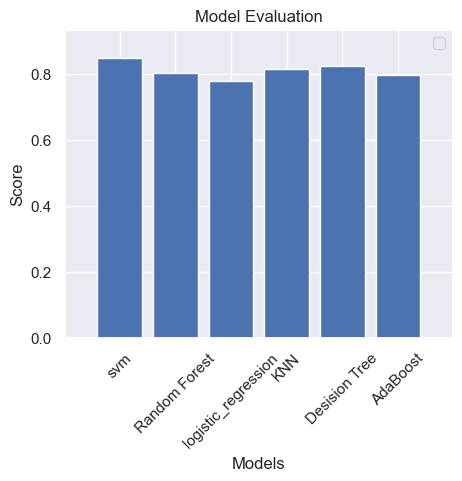

In [61]:
plt.bar(score_dataframe["model"],score_dataframe["best_mean_score"])
plt.title("Model Evaluation")
plt.xlabel("Models")
plt.ylabel("Score")
plt.grid(True)

plt.legend()
plt.margins(0.1, 0.1)
plt.xticks(rotation=45)

In [35]:
clf=SVC(C= 100, gamma= 'scale', kernel= 'rbf')
clf.fit(X_train,y_train)

SVC(C=100)

In [36]:
y_pred=clf.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred), "Precision:", precision_score(y_test, y_pred, average='weighted'), "Recall:", recall_score(y_test, y_pred, average='weighted'), "F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9295774647887324 Precision: 0.9343618085402123 Recall: 0.9295774647887324 F1 Score: 0.9311377308976689


# Feature Selection

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import recall_score



# Create a logistic regression model
logreg = LogisticRegression()

# Create a grid of hyperparameters to search over
param_grid = {
    
    'n_features_to_select': list(range(1,11))
}

# Create a feature selector using RFE
rfe = RFE(logreg)

# Create a grid search object with cross-validation
grid_search = GridSearchCV(rfe, param_grid=param_grid, cv=5,n_jobs=4)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'n_features_to_select': 10}
Best score: 0.89


In [39]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.533178,0.016088,0.002821,0.001331,1,{'n_features_to_select': 1},0.794118,0.797059,0.785294,0.788235,0.805882,0.794118,0.007204,10
1,0.508302,0.042375,0.002468,0.000684,2,{'n_features_to_select': 2},0.802941,0.788235,0.794118,0.805882,0.829412,0.804118,0.014118,9
2,0.464437,0.022051,0.002298,0.000598,3,{'n_features_to_select': 3},0.814706,0.802941,0.820588,0.826471,0.841176,0.821176,0.012671,8
3,0.474210,0.014788,0.002201,0.000746,4,{'n_features_to_select': 4},0.876471,0.852941,0.864706,0.829412,0.850000,0.854706,0.015740,7
4,0.406591,0.005394,0.002103,0.000496,5,{'n_features_to_select': 5},0.879412,0.850000,0.867647,0.829412,0.861765,0.857647,0.017008,6
5,0.395959,0.027638,0.002451,0.000555,6,{'n_features_to_select': 6},0.882353,0.850000,0.873529,0.826471,0.867647,0.860000,0.019826,5
6,0.355024,0.018913,0.002007,0.000638,7,{'n_features_to_select': 7},0.911765,0.855882,0.891176,0.847059,0.882353,0.877647,0.023573,4
7,0.348567,0.022419,0.002800,0.000400,8,{'n_features_to_select': 8},0.911765,0.855882,0.891176,0.850000,0.885294,0.878824,0.022964,3
8,0.299406,0.012770,0.003002,0.000635,9,{'n_features_to_select': 9},0.914706,0.876471,0.888235,0.847059,0.891176,0.883529,0.022057,2
9,0.302134,0.048066,0.002130,0.000621,10,{'n_features_to_select': 10},0.926471,0.876471,0.888235,0.870588,0.888235,0.890000,0.019474,1


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


rfe = RFE(model, n_features_to_select=10)

# Fit the RFE model to the data
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected features:", X_train.columns[rfe.support_])


Selected features: Index(['baseline value', 'accelerations', 'uterine_contractions',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance'],
      dtype='object')


In [41]:
X_train=df_Train[ X_train.columns[rfe.support_]]
X_train

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance
1233,125.0,0.000,0.008,0.000,32.0,3.0,126.0,125.0,127.0,2.0
480,140.0,0.000,0.001,0.000,60.0,32.0,141.0,141.0,142.0,3.0
1111,122.0,0.000,0.000,0.000,20.0,0.0,120.0,119.0,121.0,3.0
1303,137.0,0.005,0.005,0.000,36.0,0.0,148.0,148.0,149.0,9.0
861,142.0,0.003,0.004,0.000,46.0,27.0,150.0,148.0,150.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1638,130.0,0.009,0.004,0.000,52.0,0.0,144.0,141.0,144.0,16.0
1095,123.0,0.012,0.002,0.000,22.0,0.0,131.0,132.0,133.0,4.0
1130,122.0,0.005,0.004,0.000,20.0,0.0,131.0,121.0,126.0,31.0
1294,115.0,0.003,0.008,0.001,24.0,0.0,133.0,122.0,129.0,45.0


In [42]:
X_test=df_Test[['baseline value','accelerations','uterine_contractions',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance']]
X_test

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance
282,133.0,0.002,0.003,0.000,46.0,0.0,139.0,135.0,138.0,9.0
1999,125.0,0.000,0.009,0.000,62.0,0.0,130.0,116.0,125.0,29.0
1709,131.0,0.004,0.004,0.001,60.0,0.0,133.0,127.0,132.0,21.0
988,131.0,0.011,0.005,0.000,29.0,0.0,143.0,145.0,145.0,9.0
2018,125.0,0.000,0.008,0.001,64.0,0.0,114.0,111.0,114.0,7.0
...,...,...,...,...,...,...,...,...,...,...
305,145.0,0.000,0.000,0.000,74.0,30.0,145.0,144.0,146.0,1.0
973,131.0,0.000,0.005,0.000,32.0,6.0,135.0,120.0,133.0,70.0
611,144.0,0.006,0.002,0.000,33.0,0.0,150.0,149.0,151.0,10.0
2108,136.0,0.000,0.008,0.000,67.0,0.0,133.0,131.0,136.0,2.0


# Normalization of 10 features

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm_train= scaler.fit_transform(X_train)
X_norm_train=pd.DataFrame(X_norm_train,columns=X_train.columns)

X_norm_train

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,0.351852,0.000000,0.533333,0.0,0.266667,0.032967,0.523810,0.477064,0.458716,0.007435
1,0.629630,0.000000,0.066667,0.0,0.640000,0.351648,0.642857,0.623853,0.596330,0.011152
2,0.296296,0.000000,0.000000,0.0,0.106667,0.000000,0.476190,0.422018,0.403670,0.011152
3,0.574074,0.277778,0.333333,0.0,0.320000,0.000000,0.698413,0.688073,0.660550,0.033457
4,0.666667,0.166667,0.266667,0.0,0.453333,0.296703,0.714286,0.688073,0.669725,0.003717
...,...,...,...,...,...,...,...,...,...,...
1695,0.444444,0.500000,0.266667,0.0,0.533333,0.000000,0.666667,0.623853,0.614679,0.059480
1696,0.314815,0.666667,0.133333,0.0,0.133333,0.000000,0.563492,0.541284,0.513761,0.014870
1697,0.296296,0.277778,0.266667,0.0,0.106667,0.000000,0.563492,0.440367,0.449541,0.115242
1698,0.166667,0.166667,0.533333,0.2,0.160000,0.000000,0.579365,0.449541,0.477064,0.167286


In [44]:

X_norm_test= scaler.transform(X_test)
X_norm_test=pd.DataFrame(X_norm_test,columns=X_test.columns)

X_norm_test

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,0.500000,0.111111,0.200000,0.0,0.453333,0.000000,0.626984,0.568807,0.559633,0.033457
1,0.351852,0.000000,0.600000,0.0,0.666667,0.000000,0.555556,0.394495,0.440367,0.107807
2,0.462963,0.222222,0.266667,0.2,0.640000,0.000000,0.579365,0.495413,0.504587,0.078067
3,0.462963,0.611111,0.333333,0.0,0.226667,0.000000,0.658730,0.660550,0.623853,0.033457
4,0.351852,0.000000,0.533333,0.2,0.693333,0.000000,0.428571,0.348624,0.339450,0.026022
...,...,...,...,...,...,...,...,...,...,...
421,0.722222,0.000000,0.000000,0.0,0.826667,0.329670,0.674603,0.651376,0.633028,0.003717
422,0.462963,0.000000,0.333333,0.0,0.266667,0.065934,0.595238,0.431193,0.513761,0.260223
423,0.703704,0.333333,0.133333,0.0,0.280000,0.000000,0.714286,0.697248,0.678899,0.037175
424,0.555556,0.000000,0.533333,0.0,0.733333,0.000000,0.579365,0.532110,0.541284,0.007435


# Model Building

In [45]:

%matplotlib inline
kfold = StratifiedKFold(n_splits=10)


In [46]:
model_params={
    'svm':{
        'model':SVC(),
        'params':{
           'C': [0.1,0.2,1,2,3,4],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']
        }
                  

        },
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [10,20,30, 50,60,70,80,90,100],
              'max_depth': [2,3,4,5,6,7,8,9],
              'max_features': ['sqrt', 'log2']
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
        
    },
    "KNN":{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors': list(range(1, 11))
            
        }
    },
    "Desision Tree":{
        "model":DecisionTreeClassifier(),
        'params' : {
         'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 4, 6, 8],
        'min_samples_leaf': [1, 2, 3, 4]
}
    },
    "AdaBoost":{
        "model": AdaBoostClassifier(),
        "params":{
            'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 1]
        }
    }
    
}

In [47]:
scores=[]
kfold = StratifiedKFold(n_splits=5)

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],scoring="recall_macro",cv=kfold,n_jobs=4)
    clf.fit(X_norm_train,y_train)
    scores.append({
        'model':model_name,
        'best_mean_score':clf.best_score_,
        "parameters":clf.best_params_
    })
    

In [48]:
scores

[{'model': 'svm',
  'best_mean_score': 0.8215336717794892,
  'parameters': {'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}},
 {'model': 'Random Forest',
  'best_mean_score': 0.876762732218553,
  'parameters': {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 90}},
 {'model': 'logistic_regression',
  'best_mean_score': 0.7764207085720305,
  'parameters': {'C': 10}},
 {'model': 'KNN',
  'best_mean_score': 0.8405337349329545,
  'parameters': {'n_neighbors': 1}},
 {'model': 'Desision Tree',
  'best_mean_score': 0.8249833003525489,
  'parameters': {'max_depth': 5,
   'min_samples_leaf': 4,
   'min_samples_split': 2}},
 {'model': 'AdaBoost',
  'best_mean_score': 0.8038435700461752,
  'parameters': {'learning_rate': 1, 'n_estimators': 50}}]

In [49]:
pd.DataFrame(scores)

,model,best_mean_score,parameters
0,svm,0.821534,"{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}"
1,Random Forest,0.876763,"{'max_depth': 9, 'max_features': 'sqrt', 'n_es..."
2,logistic_regression,0.776421,{'C': 10}
3,KNN,0.840534,{'n_neighbors': 1}
4,Desision Tree,0.824983,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s..."
5,AdaBoost,0.803844,"{'learning_rate': 1, 'n_estimators': 50}"


In [50]:

graph_x=[]
graph_y=[]
for x in scores:
    graph_x.append(x["model"])
    graph_y.append(x["best_mean_score"])
    



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'svm'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'logistic_regression'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Desision Tree'),
  Text(5, 0, 'AdaBoost')])

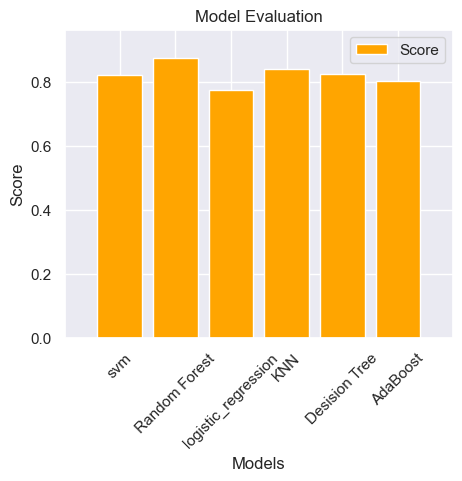

In [51]:
import matplotlib.pyplot as plt
plt.bar(graph_x, graph_y, color='orange',label="Score")
plt.title("Model Evaluation")
plt.xlabel("Models")
plt.ylabel("Score")
plt.grid(True)

plt.legend()
plt.margins(0.1, 0.1)
plt.xticks(rotation=45)

In [52]:
clf1=RandomForestClassifier(max_depth= 9, max_features='sqrt', n_estimators=80)

In [53]:
clf1.fit(X_norm_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=80)

In [54]:
y_pred=clf1.predict(X_norm_test)
y_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 3., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9413145539906104
Precision: 0.9396674216720537
Recall: 0.9413145539906104
F1 Score: 0.9392151577122555


In [56]:
import pickle

In [57]:
pickle.dump(clf1,open('fetal.pkl','wb'))

In [58]:
pickle.dump(scaler,open("scaling.pkl","wb"))

In [59]:
model=pickle.load(open('fetal.pkl','rb'))